# Data Collection

In [58]:
# Retreive video game dataset from Kaggle
# https://www.kaggle.com/datasets/thedevastator/global-video-game-sales

import pandas as pd

file_path = '../Data/vg_sales.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was read correctly
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Exploratory data analysis (EDA)

In [59]:
# Retrieve list of columns, their data types, and information about missing values.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [60]:
# Summary of statistics for the DataFrame columns.
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [61]:
# Print the number of rows and columns
print("the dimension:", data.shape)

the dimension: (16598, 11)


In [62]:
# Selects the values of the first row of DataFrame
data_values = data.iloc[0]
data_values

Rank                     1
Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

In [63]:
# Print unique values for categorical values
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = data[col].nunique()
    print("Unique count of column '{}': {}".format(col, unique_count))

Unique count of column 'Name': 11493
Unique count of column 'Platform': 31
Unique count of column 'Genre': 12
Unique count of column 'Publisher': 578


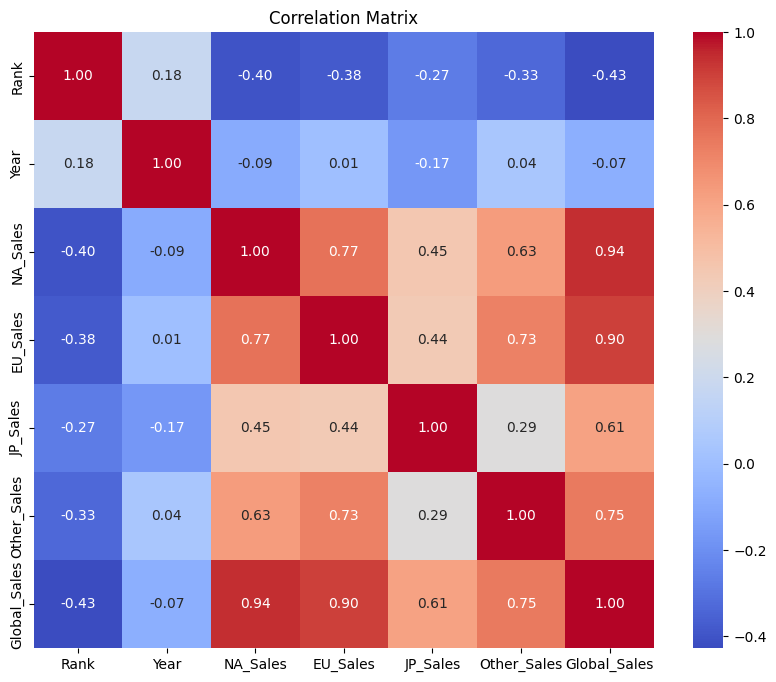

In [64]:
# Visualize corelation

import seaborn as sns
import matplotlib.pyplot as plt

data_correlation = data.corr(numeric_only=True)

# Plot correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


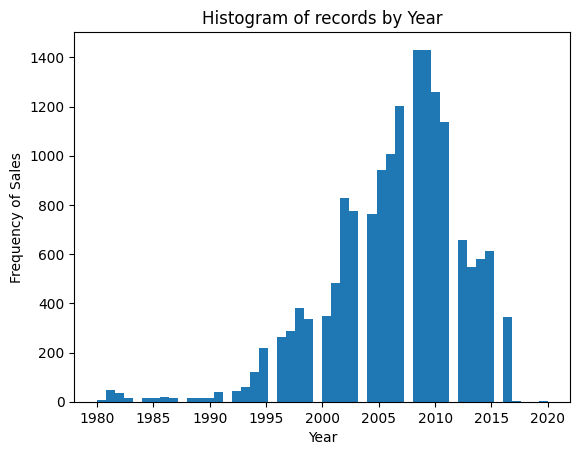

In [65]:
# Display frenquency of Bike cost
plt.hist(data['Year'], bins=50)
plt.xlabel('Year')
plt.ylabel('Frequency of Sales')
plt.title('Histogram of records by Year')
plt.show()



In [66]:
# Show unique values of the 'Year' column
data['Year'].value_counts().sort_index()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: count, dtype: int64

# Data Cleaning and Transformation

In [67]:
# Filter data for years between 2005 and 2015 (inclusive).
data1 = data[(data['Year'] >= 2005) & (data['Year'] <= 2015)]
data1['Year'].value_counts().sort_index()


Year
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
Name: count, dtype: int64

In [68]:
# Get count and percentage of Null Values
data_null_count = data1.isnull().sum()
data_null_percentage = (data1.isnull().sum() / data1.shape[0]) * 100
null_values = pd.DataFrame({
    'Null Count': data_null_count,
    'Null Percentage': data_null_percentage
})
null_values

,Null Count,Null Percentage
Rank,0,0.000000
Name,0,0.000000
Platform,0,0.000000
Year,0,0.000000
Genre,0,0.000000
Publisher,15,0.138799
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000


In [69]:
# Drop Null valyes in columns Publisher
data2 = data1.dropna(subset=['Publisher'])

In [70]:
# Verify that there are no more Null Values
data_null_count = data2.isnull().sum()
data_null_percentage = (data2.isnull().sum() / data2.shape[0]) * 100
null_values = pd.DataFrame({
    'Null Count': data_null_count,
    'Null Percentage': data_null_percentage
})
null_values

,Null Count,Null Percentage
Rank,0,0.0
Name,0,0.0
Platform,0,0.0
Year,0,0.0
Genre,0,0.0
Publisher,0,0.0
NA_Sales,0,0.0
EU_Sales,0,0.0
JP_Sales,0,0.0
Other_Sales,0,0.0


In [81]:
#Filter for one single Publisher

ea_data = data2[data2['Publisher'] == 'Electronic Arts']

In [82]:
# Save the DataFrame to an Excel file for use in Power BI for visualization
ea_data.to_excel('../Data/VideoGames_Data.xlsx', index=False)